In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [32]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [33]:
ig_df_train = pd.read_csv('train.csv')
ig_df_test = pd.read_csv('test.csv')

In [34]:
ig_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [35]:
ig_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [36]:
ig_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [37]:
ig_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [38]:
ig_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [39]:
ig_df_train.duplicated().sum()

np.int64(2)

In [40]:
ig_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [41]:
ig_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [42]:
ig_df_train['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [43]:
(ig_df_train['description length'] > 50).sum()

np.int64(98)

In [44]:
ig_df_train = ig_df_train.drop_duplicates()

In [45]:
ig_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [46]:
ig_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [47]:
ig_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [48]:
ig_df_test.duplicated().sum()

np.int64(2)

In [49]:
ig_df_test = ig_df_test.drop_duplicates()

In [50]:
ig_df_test['fake'].value_counts()

fake
0    60
1    58
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Fake vs Genuine Accounts')

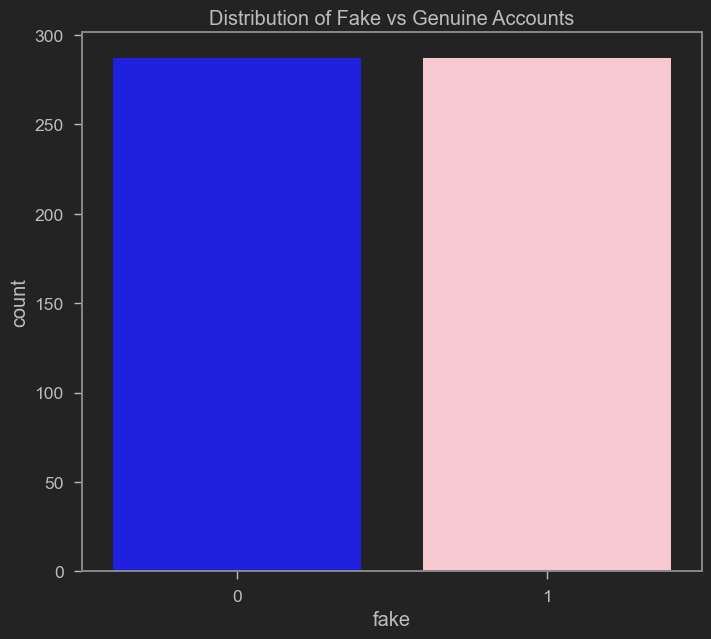

In [51]:
sns.countplot(
    x='fake',
    hue = 'fake',
    data=ig_df_train,
    palette=['blue','pink'],
    legend = False
)
plt.title("Distribution of Fake vs Genuine Accounts")

Text(0.5, 1.0, 'Followers Distribution: Fake vs Genuine')

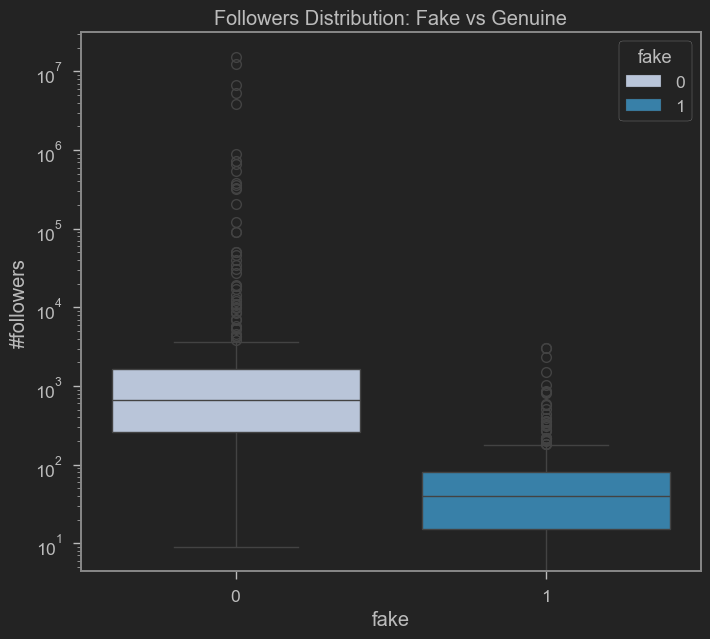

In [52]:
sns.boxplot(
    x='fake',
    y='#followers',
    hue = 'fake',
    data=ig_df_train,
    palette= 'PuBu',
)
plt.yscale('log')
plt.title("Followers Distribution: Fake vs Genuine")

Text(0.5, 1.0, 'External URL Distribution: Fake vs Genuine')

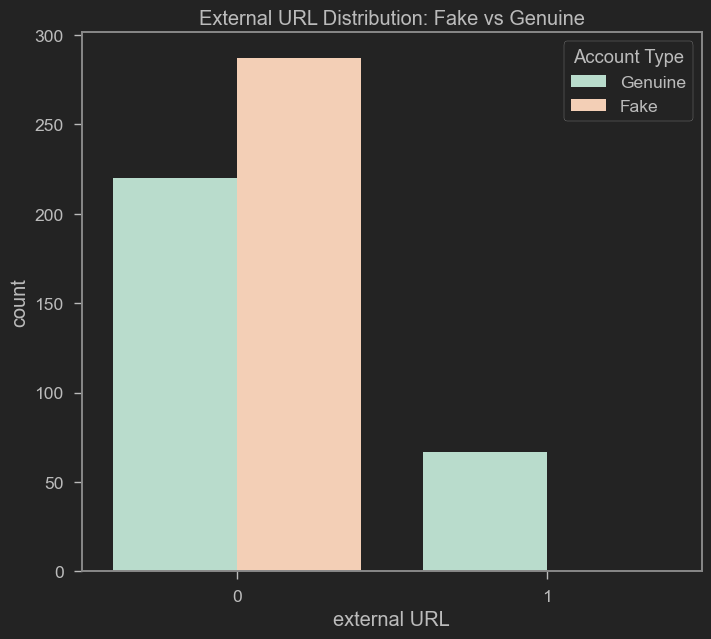

In [53]:
sns.countplot(
    x='external URL',
    hue='fake',
    data=ig_df_train,
    palette= 'Pastel2',
)
plt.legend(title = "Account Type", labels = ['Genuine', 'Fake'])
plt.title("External URL Distribution: Fake vs Genuine")

Text(0.5, 1.0, 'Bio Length: Fake vs Genuine')

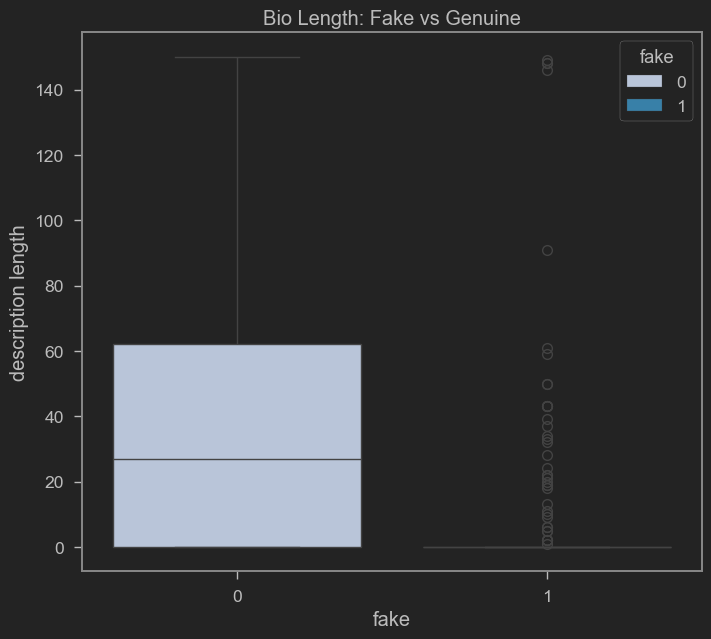

In [54]:
sns.boxplot(
    x='fake',
    y='description length',
    hue = 'fake',
    data=ig_df_train,
    palette= 'PuBu'
)
plt.title("Bio Length: Fake vs Genuine")

Text(0.5, 1.0, 'Post Count: Fake vs Genuine')

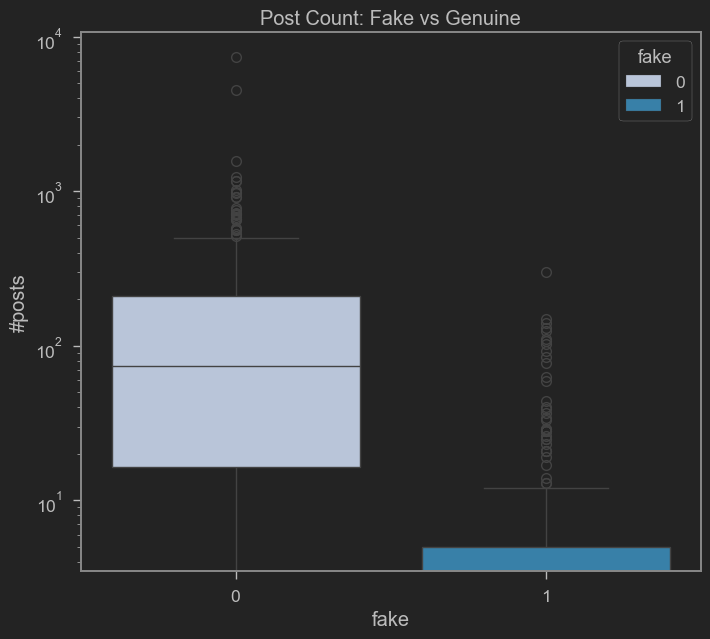

In [55]:
sns.boxplot(
    x='fake',
    y='#posts',
    hue = 'fake',
    data=ig_df_train,
    palette= 'PuBu'
)
plt.yscale('log')
plt.title("Post Count: Fake vs Genuine")

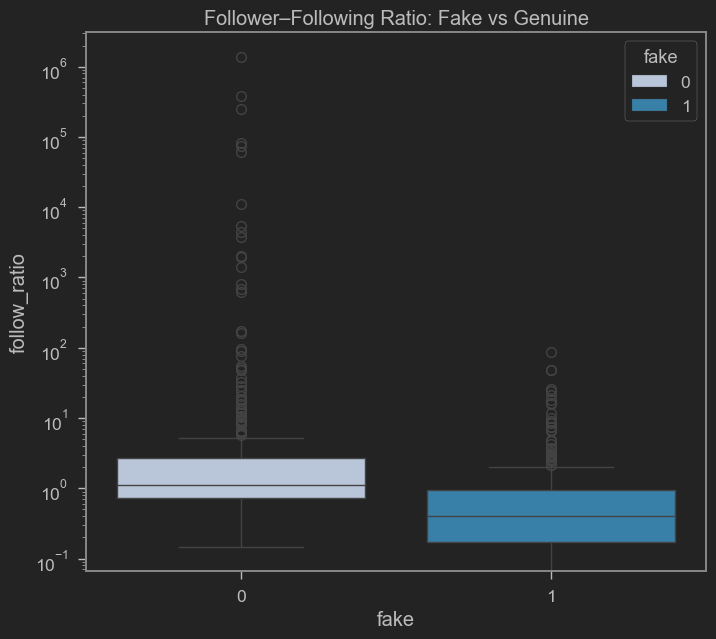

In [56]:
ig_df_train = ig_df_train.copy()
ig_df_train.loc[:, 'follow_ratio'] = ig_df_train['#followers'] / (ig_df_train['#follows'] + 1)
sns.boxplot(
    x = 'fake',
    y = 'follow_ratio',
    hue = 'fake',
    data = ig_df_train,
    palette = 'PuBu'
)
plt.yscale('log')
plt.title("Follower–Following Ratio: Fake vs Genuine")

ig_df_test = ig_df_test.copy()
ig_df_test.loc[:, 'follow_ratio'] = (
    ig_df_test['#followers'] / (ig_df_test['#follows'] + 1)
)

Text(0.5, 1.0, 'Numeric Pattern in Username: Fake vs Genuine')

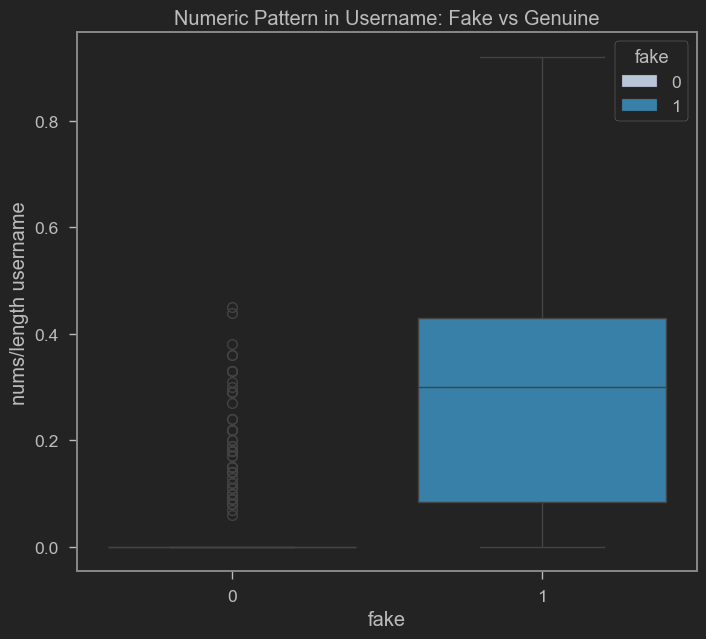

In [57]:
sns.boxplot(
    x='fake',
    y='nums/length username',
    hue = 'fake',
    data=ig_df_train,
    palette='PuBu'
)
plt.title("Numeric Pattern in Username: Fake vs Genuine")

Text(0.5, 1.0, 'Name Equals Username vs Account Type')

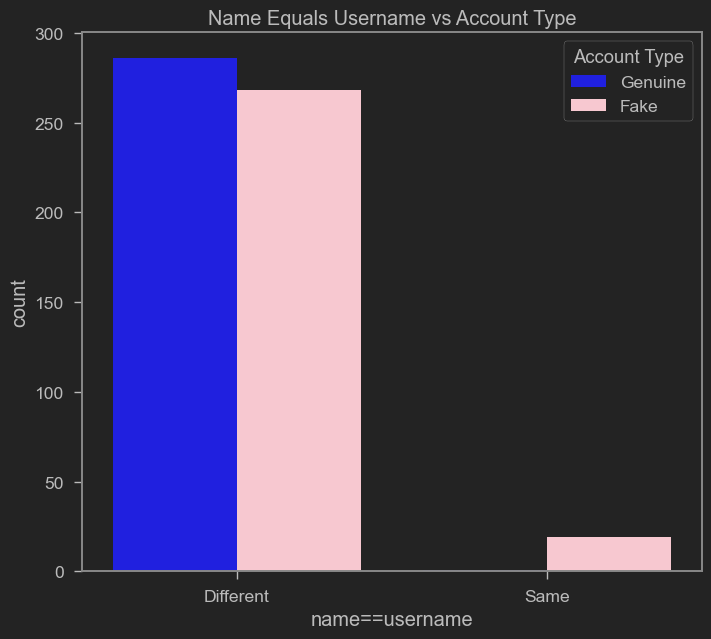

In [58]:
sns.countplot(
    x = 'name==username',
    hue = 'fake',
    data= ig_df_train,
    palette = ['blue', 'pink']
)
plt.xticks([0,1], ('Different', 'Same'))
plt.legend(title = 'Account Type', labels =['Genuine', 'Fake'])
plt.title("Name Equals Username vs Account Type")           

Text(0.5, 1.0, 'Username Numeric Length Distribution')

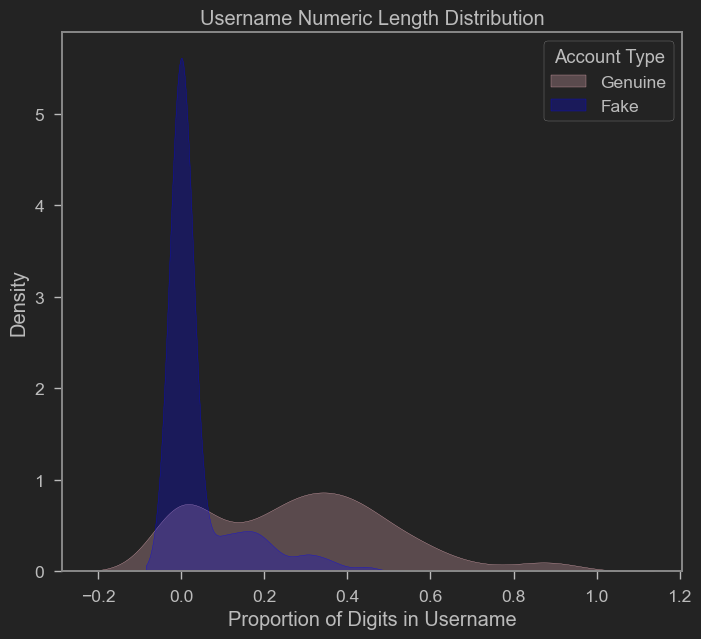

In [59]:
sns.kdeplot(
    data=ig_df_train,
    x='nums/length username',
    hue='fake',
    fill = True,
    palette = ['Blue', 'Pink']
)
plt.legend(title = 'Account Type', labels = ['Genuine', 'Fake'])
plt.xlabel("Proportion of Digits in Username")
plt.title("Username Numeric Length Distribution")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

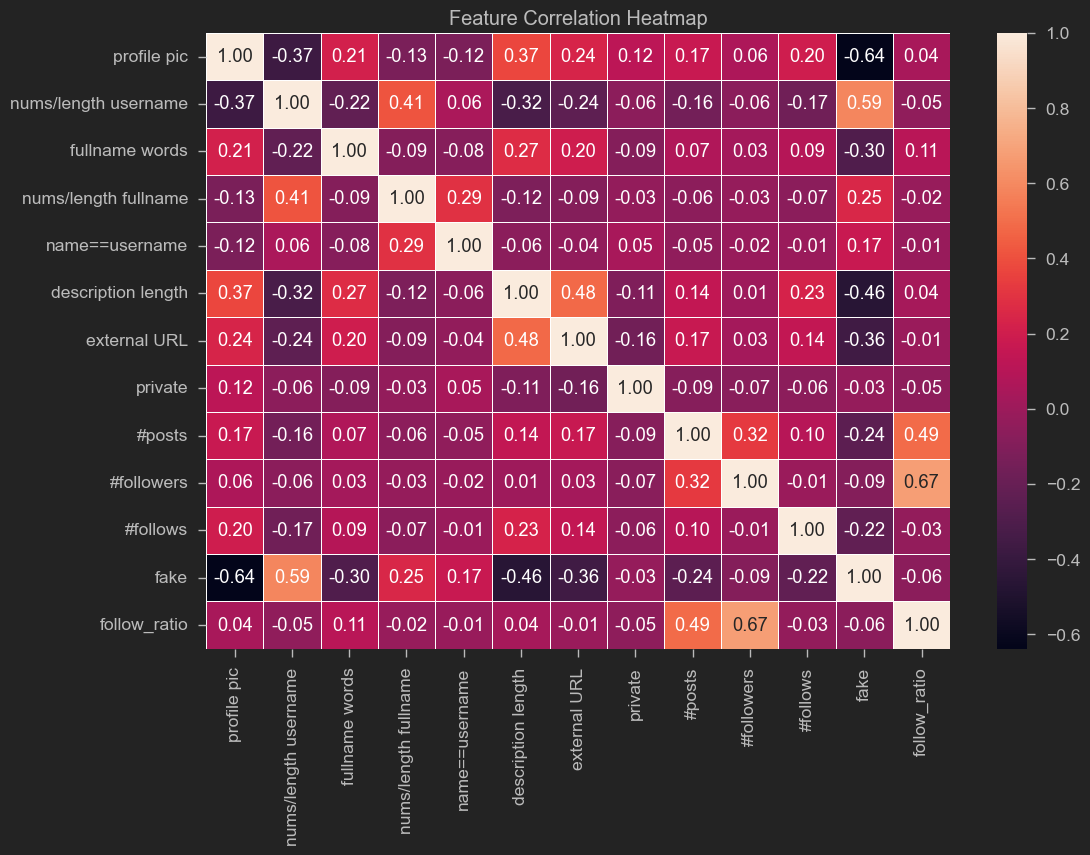

In [60]:
plt.figure(figsize=(12,8))
corr = ig_df_train.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")

In [61]:
x_train = ig_df_train.drop(columns = ['fake'])
x_test = ig_df_test.drop(columns = ['fake'])

In [62]:
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,follow_ratio
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,1.046025
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,5.131086
2,1,0.10,2,0.00,0,0,0,1,13,159,98,1.606061
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0.634969
4,1,0.00,2,0.00,0,0,0,1,6,151,126,1.188976
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,0.278057
572,1,0.38,1,0.33,0,21,0,0,44,66,75,0.868421
573,1,0.57,2,0.00,0,0,0,0,4,96,339,0.282353
574,1,0.57,1,0.00,0,11,0,0,0,57,73,0.770270


In [63]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,follow_ratio
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.806612
1,1,0.00,5,0.00,0,64,0,1,3,35,6,5.000000
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0.490284
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,2.020353
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0.630252
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,0.140394
116,1,0.40,1,0.00,0,0,0,0,4,150,164,0.909091
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,0.233137
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,0.129127


In [89]:
y_train = ig_df_train['fake']
y_test = ig_df_test['fake']

In [65]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 574, dtype: int64

In [66]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 118, dtype: int64

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [68]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [69]:
X_train.shape,X_test.shape

((574, 12), (118, 12))

In [70]:
Y_train.shape,Y_test.shape

((574, 2), (118, 2))

In [71]:
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage

82.94797687861272

In [72]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage

17.052023121387283

In [79]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input

model = Sequential() 
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(50, activation = "relu")) 
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) 

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         3,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,127 (47.37 KB)

 Trainable params: 12,127 (47.37 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6453 - loss: 0.6587 - val_accuracy: 0.4828 - val_loss: 0.7145
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7849 - loss: 0.5717 - val_accuracy: 0.6034 - val_loss: 0.6511
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.4743 - val_accuracy: 0.6897 - val_loss: 0.5503
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8760 - loss: 0.3879 - val_accuracy: 0.8276 - val_loss: 0.3394
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8702 - loss: 0.3495 - val_accuracy: 0.8103 - val_loss: 0.3378
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.3115 - val_accuracy: 0.9138 - val_loss: 0.2033
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8895 - loss: 0.2965 - val_accuracy: 0.8793 - val_loss: 0.2696
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8934 - loss: 0.2855 - val_accuracy: 0.8966 - val_loss

In [82]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


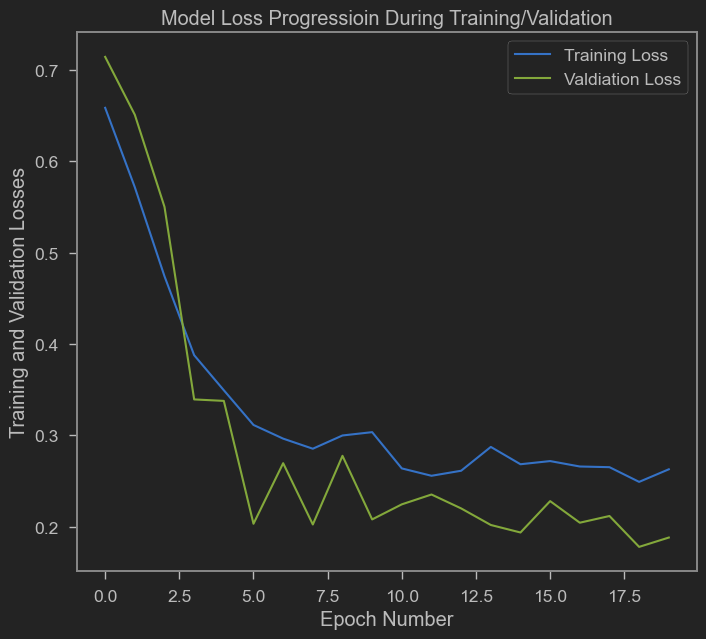

In [83]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [84]:
predicted = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [85]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [86]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.92      0.84      0.88        58

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.89      0.89      0.89       118



<Axes: >

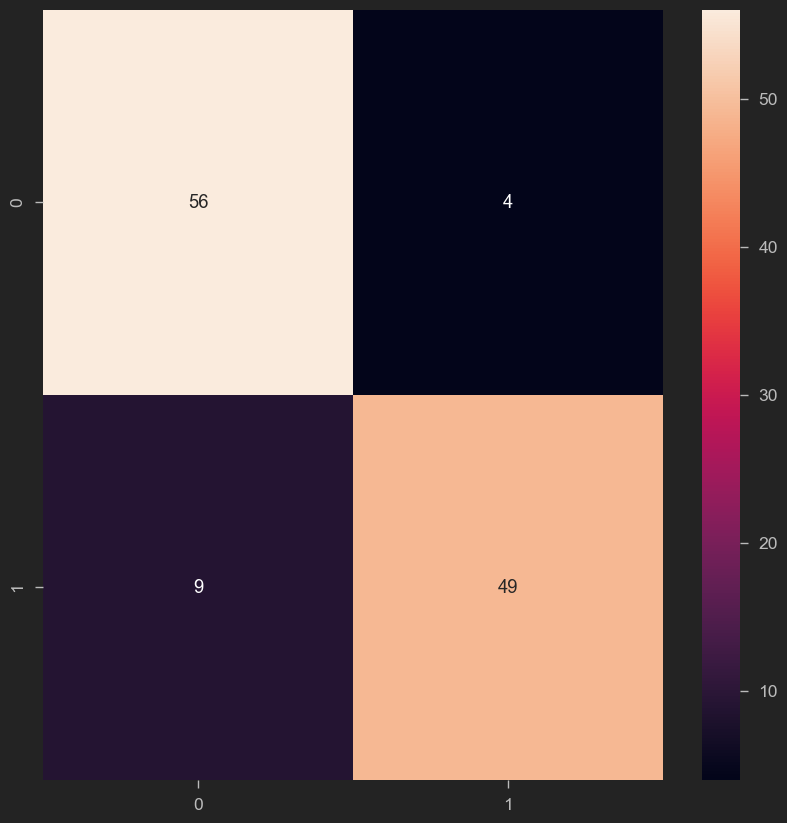

In [87]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)